Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$
\theta
$

In [ ]:
# 学習データを読み込む
train = np.loadtxt('./click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

In [ ]:
plt.plot(train_x, train_y, 'o')
plt.show

$$
    \begin{align}
        f_\theta(x) = \theta_0 + \theta_1x
    \end{align}
$$

In [2]:
# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

# 予測関数
def f(x):
    return theta0 + theta1 * x

# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

$$
    \begin{align}
        Z^{(i)} = \frac{x^{(i)} - \mu}{\sigma}
    \end{align}
$$

In [7]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)


<function matplotlib.pyplot.show(*args, **kw)>

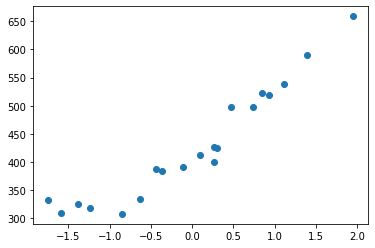

In [9]:
plt.plot(train_z, train_y, 'o')
plt.show

C

$$
    \begin{align}
        E(\theta) = \frac{1}{2}\sum_{i=1}^{n}(y^{(i)}-f_\theta(x^{(i)}))^2 
    \end{align}
$$

In [10]:
# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # パラメータを更新
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 前回の誤差との差分を計算
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1回目: theta0 = 8.985, theta1 = 2.486, 差分 = 76205.7574
2回目: theta0 = 17.389, theta1 = 4.305, 差分 = 73188.0094
3回目: theta0 = 25.624, theta1 = 6.089, 差分 = 70289.7642
4回目: theta0 = 33.694, theta1 = 7.837, 差分 = 67506.2896
5回目: theta0 = 41.603, theta1 = 9.550, 差分 = 64833.0405
6回目: theta0 = 49.354, theta1 = 11.228, 差分 = 62265.6521
7回目: theta0 = 56.950, theta1 = 12.873, 差分 = 59799.9323
8回目: theta0 = 64.394, theta1 = 14.485, 差分 = 57431.8550
9回目: theta0 = 71.689, theta1 = 16.065, 差分 = 55157.5535
10回目: theta0 = 78.839, theta1 = 17.613, 差分 = 52973.3144
11回目: theta0 = 85.845, theta1 = 19.131, 差分 = 50875.5711
12回目: theta0 = 92.711, theta1 = 20.618, 差分 = 48860.8985
13回目: theta0 = 99.440, theta1 = 22.075, 差分 = 46926.0069
14回目: theta0 = 106.034, theta1 = 23.503, 差分 = 45067.7371
15回目: theta0 = 112.496, theta1 = 24.902, 差分 = 43283.0547
16回目: theta0 = 118.829, theta1 = 26.274, 差分 = 41569.0457
17回目: theta0 = 125.036, theta1 = 27.618, 差分 = 39922.9115
18回目: theta0 = 131.118, theta1 = 28.935, 差分 = 38341.9642
19

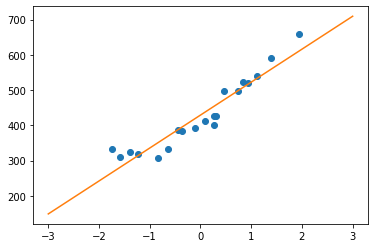

In [11]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

$$
    \begin{align}
        f_\theta(x) = \theta_0 + \theta_1x
    \end{align}
$$

$$
    \begin{align}
        E(\theta) = \frac{1}{2}\sum_{i=1}^{n}(y^{(i)}-f_\theta(x^{(i)}))^2 
    \end{align}
$$

$$
    \begin{align}
        \theta_0 := \theta_0 - \eta\sum_{i=1}^{n}(f_\theta(x^{(i)}) - y^{(i)}) \\
        \theta_1 := \theta_1 - \eta\sum_{i=1}^{n}(f_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
    \end{align}
$$